# Demanda de reserva de hoteles - Abstract

El dataset elegido contiene información sobre reservas de un hotel urbano y un hotel resort, también incluye información específica como cuándo se realizó la reserva, la duración de la estadía, la cantidad de adultos, niños y/o bebés, y la cantidad de espacios de estacionamiento disponibles, entre otra información relevante para responder a preguntas como "¿Cuál es la mejor época del año para reservar una habitación de hotel?" o "¿Cómo podemos predecir las cancelaciones de un hotel?"

Por supuesto, toda la información de identificación personal se ha eliminado del dataset con el fin de proteger los datos sensibles de cada usuario.

Consideramos que este dataset es ideal para realizar análisis exploratorio y construir modelos predictivos, debido a la cantidad de información que podemos utilizar a nuestro favor para realizar el análisis exploratorio (EDA) y/o construir un modelo, por ejemplo, de previsión o pronóstico de demanda y cancelaciones.


**Responderemos a las siguientes preguntas:**

1- ¿Cuáles son los meses con más demanda?

2- ¿Qué tipo de hotel tiene más reservas?

3- Huéspedes qué regresan al mismo hotel

4- Tipo de huéspedes (Número de adultos, niños y bebés)

5- ¿Cuál es el porcentaje de cancelaciones?

6- Tipo de comida preferida por los huéspedes

7- ¿De qué país son la mayoría de huéspedes?

8- ¿Cuál es el tipo de habitación preferida por los huéspedes?


Estas preguntas nos ayudarán a dar conclusiones reales sobre la demanda de reserva de hoteles, desde información básica hasta información avanzada para crear el modelo predictivo.

# Descripción de los datos

hotel : Hotel(Resort Hotel o City Hotel)

is_canceled : Valor que indica si la reserva fue cancelada (1) o no (0)

lead_time : Número de días transcurridos entre la fecha de entrada de la reserva en el PMS y la fecha de llegada

arrival_date_year : Año de la fecha de llegada

arrival_date_month : Mes de la fecha de llegada

arrival_date_week_number : Número de semana del año de la fecha de llegada

arrival_date_day_of_month : Día de la fecha de llegada

stays_in_weekend_nights : Número de noches de fin de semana (sábado o domingo) que el huésped se ha alojado o ha reservado para alojarse en el hotel

stays_in_week_nights : Número de noches entre semana (de lunes a viernes) que el huésped se alojó o reservó para alojarse en el hotel

adults : Número de adultos

children : Número de niños

bebés : Número de bebés

meal : Tipo de comida reservada. (Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner))

country : País de origen.

market_segment : Designación del segmento de mercado. En las categorías, el término "TA" significa "Agencias de Viajes" y "TO" significa "Turoperadores"

distribution_channel : Canal de distribución de reservas. El término "TA" significa "Agencias de Viajes" y "TO" significa "Turoperadores"

is_repeated_guest : Valor que indica si el nombre de la reserva era de un huésped repetido (1) o no (0)

previous_cancellations : Número de reservas anteriores que fueron canceladas por el cliente antes de la reserva actual

previous_bookings_not_canceled : Número de reservas anteriores no canceladas por el cliente antes de la reserva actual

reserved_room_type : Código del tipo de habitación reservada. El código se presenta en lugar de la designación por razones de anonimato.

assigned_room_type : Código del tipo de habitación asignado a la reserva.

booking_changes : Número de cambios/enmiendas realizados en la reserva desde el momento en que se introdujo la reserva en el PMS hasta el momento de la entrada o la cancelación.

deposit_type : Indicación de si el cliente hizo un depósito para garantizar la reserva.

agent : ID de la agencia de viajes que realizó la reserva

company : ID de la empresa/entidad que realizó la reserva o responsable del pago de la misma.

days_in_waiting_list : Número de días que la reserva estuvo en la lista de espera antes de ser confirmada al cliente

customer_type : Tipo de reserva, asumiendo una de las cuatro categorías

adr : Tarifa media diaria definida dividiendo la suma de todas las transacciones de alojamiento por el número total de noches de estancia

required_car_parking_spaces : Número de plazas de aparcamiento requeridas por el cliente

total_of_pecial_requests : Número de solicitudes especiales realizadas por el cliente (por ejemplo, cama doble o piso alto)

reservation_status : Estado de la última reserva, asumiendo una de las tres categorías

# Preparación de los datos
Limpieza y manipulación

In [133]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
import folium 
from urllib.request import urlopen
import json
import numpy as np
import io
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.inspection import permutation_importance

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline
import pandas_profiling

plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = 20,12
sns.set(style = 'darkgrid')

In [135]:
from google.colab import files 
uploaded = files.upload()

Saving hotel_bookings.csv to hotel_bookings (2).csv


In [136]:
from pandas.io.parsers.readers import csv

In [137]:
df = pd.read_csv(io.BytesIO(uploaded['hotel_bookings.csv']))
df.shape

(119390, 32)

In [138]:
type(df)

pandas.core.frame.DataFrame

In [139]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [140]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [142]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [143]:
def impute_median(series):
    return series.fillna(series.median())

In [144]:
df.children = df['children'].transform(impute_median)
df.agent = df['agent'].transform(impute_median)

In [145]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                                  0
company         

In [146]:
print(df['country'].mode())

0    PRT
dtype: object


In [147]:
df['country'].fillna(str(df['country'].mode().values[0]),inplace=True)

In [148]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                                  0
company         

In [149]:
df['arrival_date_year'] = df['arrival_date_year'].apply(lambda x: str(x))

# Análisis EDA
Visualizaciones, hipótesis y recomendaciones.

**¿Cuáles son los meses con más demanda?**

Text(0, 0.5, 'Número de visitantes')

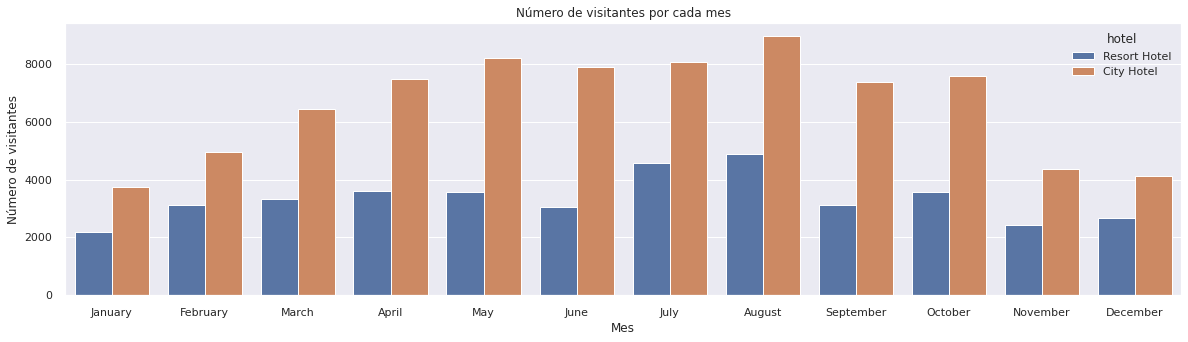

In [150]:
plt.figure(figsize=(20,5))

l1 = ['hotel','arrival_date_month']

sns.countplot(data = df[l1],x= "arrival_date_month",hue="hotel",order=["January","February","March","April","May","June",
                                                                             
"July","August","September","October","November","December"]).set_title('Número de visitantes por cada mes')
plt.xlabel('Mes')
plt.ylabel('Número de visitantes')

**Respuesta:**
Gracias a la visualización podemos concluir que Agosto es el mes con más demanda, tanto en el hotel de ciudad como en el hotel resort. Por otro lado, Enero es el mes con menos demanda en ambos tipos de hotel. Consideramos que esto es debido a que en Agosto las condiciones climáticas son más favorables para reservar, gracias al verano.

**Recomendación:** Incentivar el turismo en los meses con menos demanda, como enero y diciembre con la intervención del estado en un trabajo mancomunado en el sector de hotelería impulsando el turismo de huéspedes nacionales y extranjeros, con el fin de aumentar el número de reservas en los meses con menos demanda y generar un comportamiento constante en el número reservas a lo largo del año.




---



**¿Qué tipo de hotel tiene más reservas?**

([<matplotlib.patches.Wedge at 0x7f16119ef4f0>,
 [Text(-0.956416133381298, -0.5433858480011854, 'City Hotel'),
  Text(0.9564161333812984, 0.5433858480011848, 'Resort Hotel')],
 [Text(-0.5216815272988897, -0.29639228072791923, '66.4%'),
  Text(0.52168152729889, 0.29639228072791896, '33.6%')])

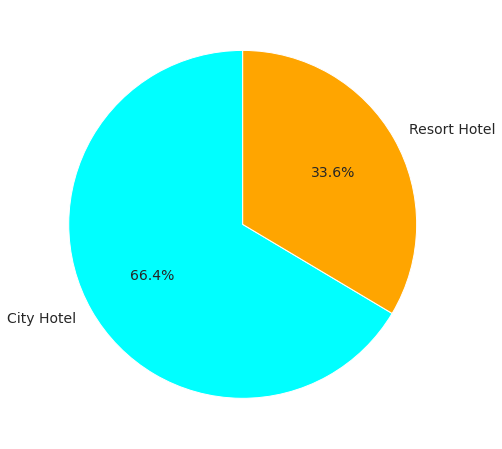

In [151]:
plt.rcParams['figure.figsize'] = 8,8

labels = df['hotel'].value_counts().index.tolist()

sizes = df['hotel'].value_counts().tolist()

colors = ["aqua","orange"]

plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})

**Respuesta:**
Los huéspedes reservan más en hoteles de ciudad; una de las principales razones es debido a que los hoteles de ciudad tienden a ser más ecónomicos y accesibles para las personas, también teniendo en cuenta la facilidad de transportarse hasta un hotel de ciudad comparado con un hotel resort.

**Recomendación:** Los hoteles resort deben facilitar la llegada del huésped al hotel con una tarifa extra opcional en el momento de realizar la reservación. ¿El huésped es extranjero? El hotel resort puede ofrecer el servicio de transporte del aeropuerto al hotel por una tarifa extra. ¿El huésped es nacional? El hotel puede brindar el servicio de transporte, sin embargo, nuestra recomendación es mantener al usuario muy bien informado de cómo llegar al hotel, qué tipo de automóvil necesita para llegar, en qué estado se encuentra la infraestructura vial para llegar al hotel y cuál es la distancia/tiempo estimado desde las principales ciudades para llegar al hotel.



---



**Huéspedes que regresan al mismo hotel**

Text(0, 0.5, 'Número de huéspedes')

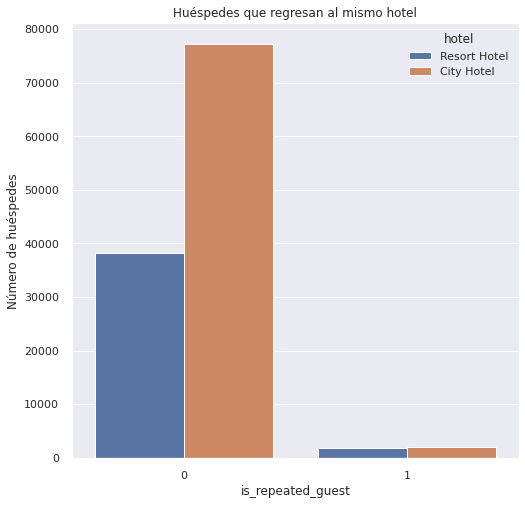

In [152]:
sns.countplot(data=df,x="is_repeated_guest",hue="hotel").set_title("Huéspedes que regresan al mismo hotel")

plt.ylabel('Número de huéspedes')

**Respuesta:**
Comencemos con el contexto de la visualización, 0 significa que los huéspedes no han regresado nuevamente y 1 significa que sí han regresado.

Sabiendo esto, podemos reconocer que la mayoría de huéspedes no regresan nuevamente al mismo hotel, un dato muy importante para implementar planes de fidelización e investigar y comprender el por qué los huéspedes no regresaron de nuevo.

**Recomendación:** Aplicar un plan de fidelización ejecutado, gestionado y medido por el equipo de marketing de cada hotel con el objetivo de aumentar la tasa de huéspedes que regresan al mismo hotel, es decir, reservar dos o más veces. Cada hotel debe observar e investigar cuáles son los motivos por los cuales los clientes no vuelven a hospedarse en el mismo hotel. Por ejemplo: ¿Son los precios del hotel muy altos? ¿La experiencia durante la estadía no fue del agrado del huésped? ¿El hotel tiene reglamentos que impiden, por ejemplo, el ingreso de mascotas? ¿El huésped tuvo problemas con el acceso a las amenidades del hotel? ¿La comida del hotel no superó las expectativas del huésped?



---



**Tipo de huéspedes (Número de adultos, niños y bebés)**

Text(0.5, 1.0, 'Número de huéspedes adultos en cada hotel')

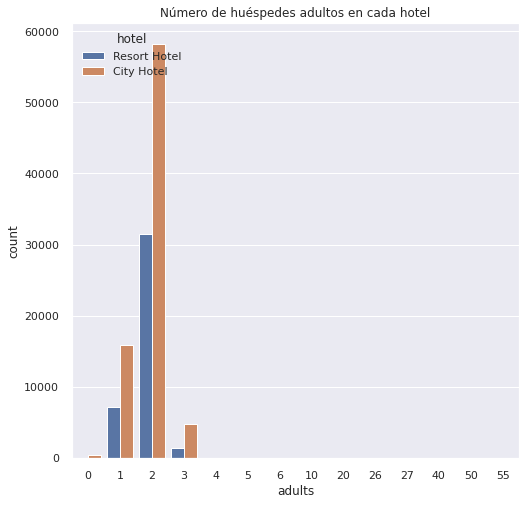

In [153]:
sns.countplot(data=df,x='adults',hue='hotel').set_title("Número de huéspedes adultos en cada hotel")

Text(0.5, 1.0, 'Número de niños en cada hotel')

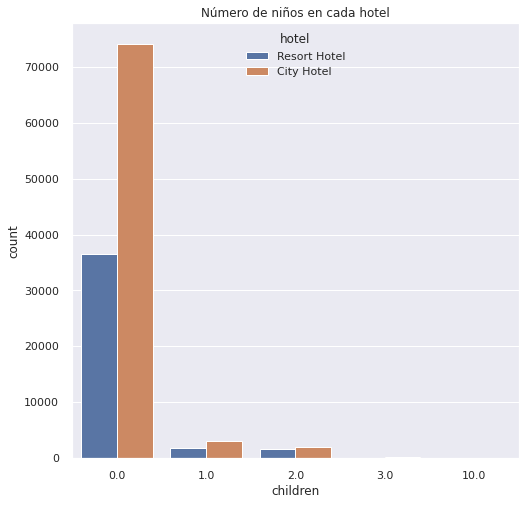

In [154]:
sns.countplot(data=df,x='children',hue='hotel').set_title("Número de niños en cada hotel")


Text(0.5, 1.0, 'Número de bebés en cada hotel')

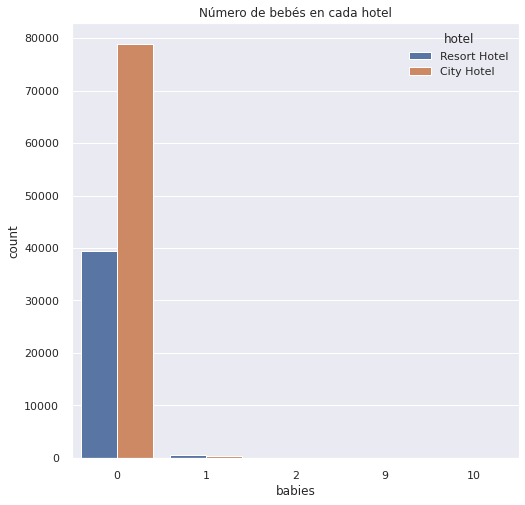

In [155]:
sns.countplot(data=df,x='babies',hue='hotel').set_title("Número de bebés en cada hotel")


**Respuesta:** Obteniendo los gráficos de los tres plots podemos concluir que entre los adultos las reservaciones realizadas con más frecuencia son para parejas/dos personas. Para ambos hoteles, es común no llevar niños y bebés, sin embargo, cuando lo hacen, llevan mayormente 1 niño y como máximo 2 niños o 1 bebé.

**Recomendación:** ¿El hotel es adecuado sólo para parejas o adultos? Cada hotel debe informar al cliente el concepto del hotel, así como las amenidades exclusivas para parejas o adultos, con el fin de crear un ambiente agradable para huéspedes que buscan lugares sin niños/bebés y desean disfrutar una estadía solitaria o en pareja.

¿El hotel es adecuado para adultos, niños y bebés? Cada hotel debe informar al cliente que el hotel es adecuado para disfrutar en familia, así como las principales amenidades de las cuales podrán disfrutar, por ejemplo, entre madre e hijo. Así como las facilidades que tiene el hotel para bebés.





---



**¿Cuál es el porcentaje de cancelaciones?**

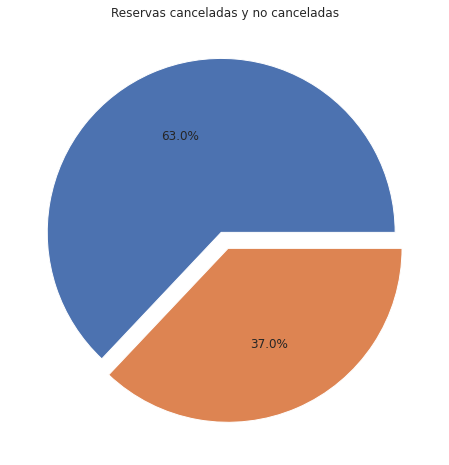

In [156]:
plt.pie(df['is_canceled'].value_counts(),
        explode=[0.05, 0.05], 
        autopct='%1.1f%%', 
        shadow=False, 
        )
plt.title("Reservas canceladas y no canceladas")
plt.show()

**Respuesta:** El 37% de las reservaciones son canceladas, una alta tasa de cancelación genera problemas a los hoteles, sea por razones internas o externas, es necesario comprender las razones por las cuales los huéspedes decidieron cancelar su reservación, por ejemplo: ¿Es el clima? ¿Encontraron un mejor hotel en la relación calidad/precio? ¿El proceso de reserva fue tedioso? ¿El cliente se arrepintió después de ver malas reseñas en medios digitales?


**Recomendación:** Comprender las principales razones de las cancelaciones recibiendo feedback por parte de los clientes, de esta forma, el hotel sabrá qué acción implementar cuando un cliente quiera cancelar su reservación y lograr disminuir la tasa de cancelación. También, si la tasa de cancelación de un hotel es alta es importante realizar un análisis interno y externo de la compañía, con el fin de reconocer los factores que están afectando negativamente la tasa de reservaciones no canceladas.



---



**Tipo de comida preferida por los huéspedes**

Text(0.5, 1.0, 'Tipo de comida preferida')

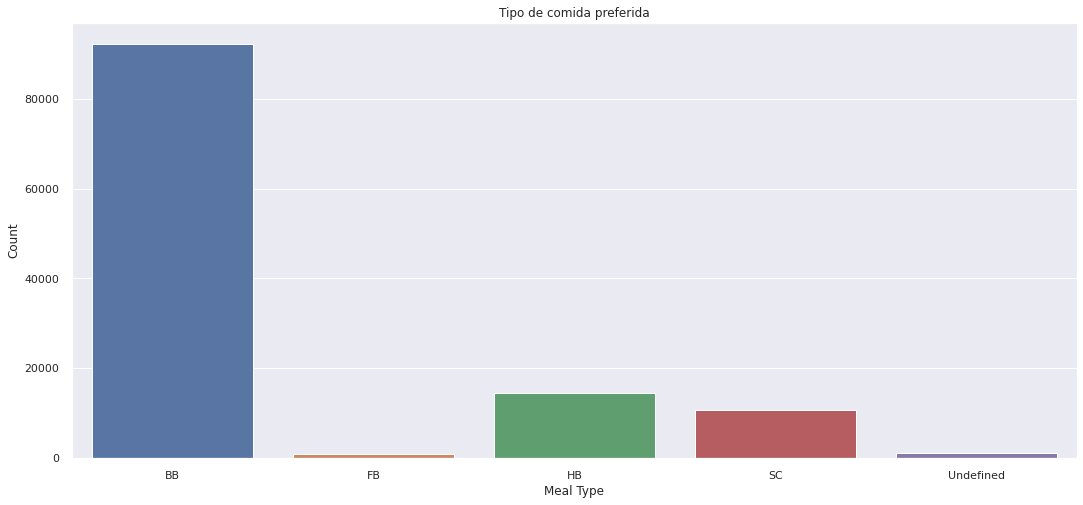

In [157]:
plt.figure(figsize=(18,8))
sns.countplot(x=df['meal'])
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.title("Tipo de comida preferida")

**Respuesta:** El tipo de comida preferida por los huéspedes es Bed&Breakfast (BB), esto se conoce como "hospedaje con desayuno". Como segundo lugar, el tipo de comida preferida por los huéspedes es Half Board (HB), este tipo de reserva incluye dos tiempos de comida, el primero es el desayuno y el segundo puede ser almuerzo o cena (es más común la cena).

**Recomendación:** Los hoteles que no cuenten con el tipo de reserva Bed&Breakfast (BB) deben considerar ofrecerla, ya que podemos observar que la mayoría de huéspedes prefieren reservar una habitación de hotel con el beneficio del desayuno incluido en el precio de la habitación. Por otro lado, cada hotel debe evaluar si realmente ofrecer Full Board (FB - desayuno, almuerzo y cena) es algo de alta relevancia para el tipo de huésped que reciben, debido a que la visualización nos presenta una nula tasa de reservas con tipo de comida Full Board.



---



**¿De qué país son la mayoría de huéspedes?**

Text(0.5, 1.0, 'Número de huéspedes de diferentes países')

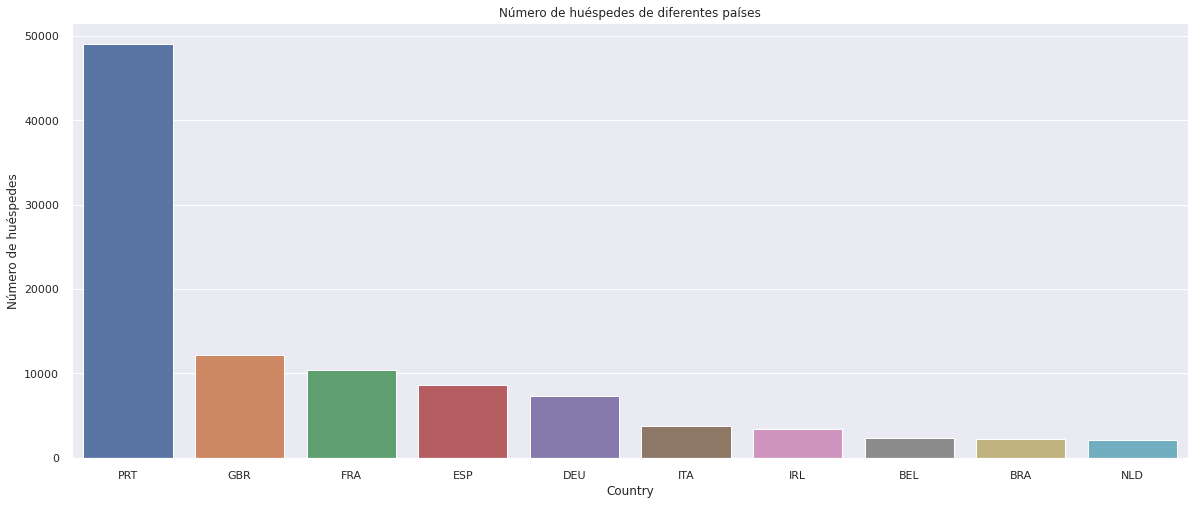

In [158]:
country_df = df['country'].value_counts().reset_index().rename(columns={'index': 'country','country': 'count of guests'})[:10]

plt.figure(figsize=(20, 8))
sns.barplot(x=country_df['country'], y=country_df['count of guests'])
plt.xlabel("Country")
plt.ylabel("Número de huéspedes")
plt.title("Número de huéspedes de diferentes países")

**Respuesta:** El número de huéspedes provenientes de Portugal (PRT) es significativamente más alto que el resto de países como Reino Unido (GBR), Francia (FRA) y España (ESP). También, podemos observar que el número de huéspedes provenientes de Países Bajos (NLD) es bajo, al igual que Brasil (BRA) y Bélgica (BEL)

**Recomendación:** En primer lugar, los hoteles deben implementar acciones para mantener el número de huéspedes provenientes de Portugal (PRT), mediante estrategias de remarketing dirigidas a portugueses. Además, los hoteles deben aumentar e impulsar el turismo de personas provenientes del resto de países como Reino Unido (GBR) y prestar atención a los huéspedes provenientes de países como Países Bajos (NLD) para evaluar si es el mercado ideal para el tipo de hotel.



---



**¿Cuál agencia de viajes realizó la mayor parte de las reservas?**



In [159]:
hightest_bookings = df.groupby(['agent']).size().reset_index().rename(columns={0:'Most_Bookings'}).sort_values(by="Most_Bookings", ascending=False)

hightest_bookings.drop(hightest_bookings[hightest_bookings['agent'] == 0].index, inplace=True)

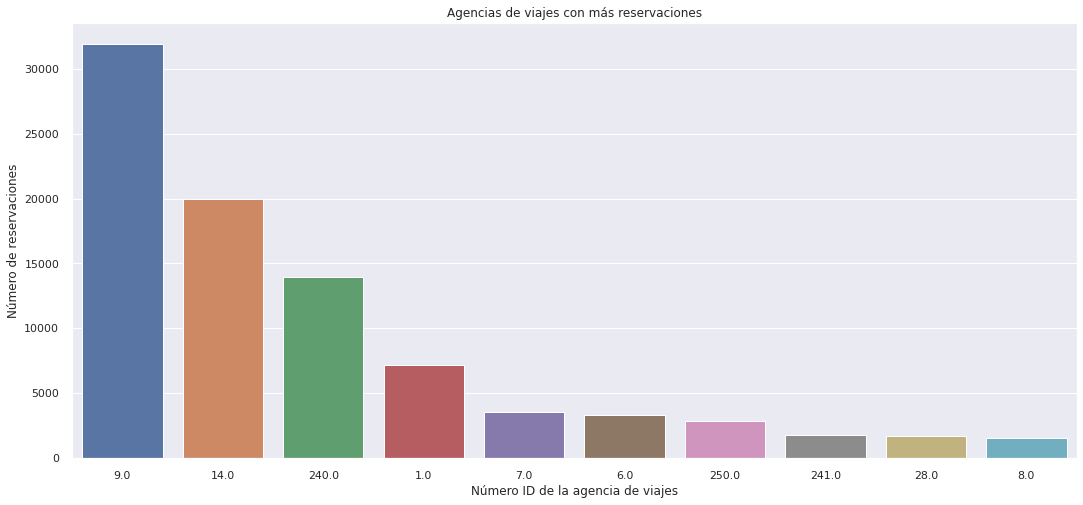

In [160]:
top_ten_highest_booking = hightest_bookings[:10]
top_ten_highest_booking = top_ten_highest_booking.sort_values(by='Most_Bookings', ascending=False)
plt.figure(figsize=(18, 8))
sns.barplot(x=top_ten_highest_booking['agent'], y=top_ten_highest_booking['Most_Bookings'], order=top_ten_highest_booking['agent'])
plt.xlabel('Número ID de la agencia de viajes')
plt.ylabel('Número de reservaciones')
plt.title("Agencias de viajes con más reservaciones")
plt.show()

**Respuesta:** La agencia de viajes ID 9.0 ha sido la que más realizó reservaciones, superando las 30,000. Su contraparte, la agencia de viajes ID 8 no logró superar las 2,500 reservaciones, al igual que las agencias de viajes ID 28 y ID 241. 

**Recomendación:** Cada hotel debe seguir manteniendo relación empresarial cercana con las 3 agencias de viajes que realizan más reservaciones y crear planes o incentivos especiales para cada agencia, en este caso las principales agencias de viajes son: ID 9, ID 14 y ID 240, debido a que estas les generan una tasa alta de reservaciones a lo largo del tiempo. Con respecto a las 5 agencias de viajes que menos realizan reservaciones, cada hotel debe evaluar si es factible brindar beneficios a estas agencias para lograr aumentar la tasa de reservación proveniente de las mismas, al igual que reconocer si es un problema externo, es decir, un problema por parte de las agencias de viajes.

# Predicción de cancelaciones - Feature Selection

¿Cuál feature numérica es la más importante?

In [161]:
cancel_corr = df.corr()["is_canceled"]
cancel_corr.abs().sort_values(ascending=False)[1:]

lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
agent                             0.051711
adr                               0.047557
babies                            0.032491
stays_in_week_nights              0.024765
company                           0.020642
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005036
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

De esta lista podemos observar que lead_time, total_of_special_requests, required_car_parking_spaces, booking_changes y previous_cancellations son las 5 features numéricas más importantes.

Sin embargo, para predecir si una reserva se cancelará o no, el número de cambios de reservas puede generar "fugas", ya que esta información puede cambiar con el tiempo.

Tampoco se incluirá days_in_waiting_list y arrival_date_year. Y la característica más importante que excluiremos es reservation_status

In [162]:
df.groupby("is_canceled")["reservation_status"].value_counts()


is_canceled  reservation_status
0            Check-Out             75166
1            Canceled              43017
             No-Show                1207
Name: reservation_status, dtype: int64

Evaluación de la feature

In [163]:
hotel_cambio = df
y = hotel_cambio.iloc[:,1]
X = pd.concat([hotel_cambio.iloc[:,0],hotel_cambio.iloc[:,2:30]], axis=1)

In [164]:
y_model = df.iloc[:,1]
X_model = pd.concat([df.iloc[:,0],df.iloc[:,2:30]], axis=1)
y_model.describe()

count    119390.000000
mean          0.370416
std           0.482918
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: is_canceled, dtype: float64

In [165]:
df.groupby("is_canceled")["reservation_status"].value_counts()

is_canceled  reservation_status
0            Check-Out             75166
1            Canceled              43017
             No-Show                1207
Name: reservation_status, dtype: int64

In [166]:
num_features = ["lead_time","arrival_date_week_number","arrival_date_day_of_month",
                "stays_in_weekend_nights","stays_in_week_nights","adults","children",
                "babies","is_repeated_guest", "previous_cancellations",
                "previous_bookings_not_canceled","agent","company",
                "required_car_parking_spaces", "total_of_special_requests", "adr"]

cat_features = ["hotel","arrival_date_month","meal","market_segment",
                "distribution_channel","reserved_room_type","deposit_type","customer_type"]

# Separar features y predecir el valor
features = num_features + cat_features
X = df.drop(["is_canceled"], axis=1)[features]
y = df["is_canceled"]


num_transformer = SimpleImputer(strategy="constant")

# Procesar las features:
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("onehot", OneHotEncoder(handle_unknown='ignore'))])

# Procesar características numéricas y categóricas
preprocessor = ColumnTransformer(transformers=[("num", num_transformer, num_features),
                                               ("cat", cat_transformer, cat_features)])

In [167]:
base_models = [("DT_model", DecisionTreeClassifier(random_state=42)),
               ("RF_model", RandomForestClassifier(random_state=42,n_jobs=-1)),
               ("LR_model", LogisticRegression(random_state=42,n_jobs=-1)),
               ("XGB_model", XGBClassifier(random_state=42, n_jobs=-1))]


kfolds = 4
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)

for name, model in base_models:

    model_steps = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    cv_results = cross_val_score(model_steps, X, y, cv=split, scoring="accuracy", n_jobs=-1)

    min_score = round(min(cv_results), 4)
    max_score = round(max(cv_results), 4)
    mean_score = round(np.mean(cv_results), 4)
    std_dev = round(np.std(cv_results), 4)
    print(f"{name} Putuación del Accuracy: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")
    

DT_model Putuación del Accuracy: 0.8253 +/- 0.0008 (std) min: 0.8241, max: 0.8261
RF_model Putuación del Accuracy: 0.8659 +/- 0.0004 (std) min: 0.8653, max: 0.8666
LR_model Putuación del Accuracy: 0.7938 +/- 0.0014 (std) min: 0.7917, max: 0.7955
XGB_model Putuación del Accuracy: 0.8186 +/- 0.0014 (std) min: 0.8164, max: 0.8203


Las tres features más importantes:

*   lead_time
*   deposit_time
*   adr



---



**lead_time**

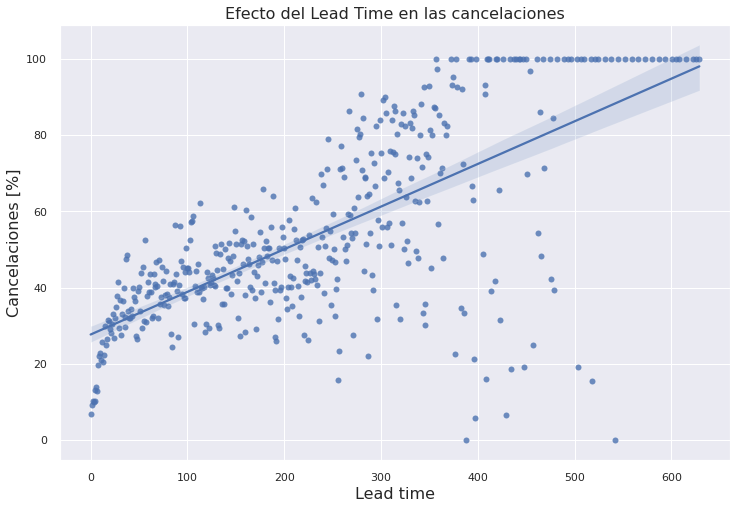

In [168]:
lead_cancel_data = df.groupby("lead_time")["is_canceled"].describe()

lead_cancel_data_10 = lead_cancel_data.loc[lead_cancel_data["count"] >= 10]

plt.figure(figsize=(12, 8))
sns.regplot(x=lead_cancel_data_10.index, y=lead_cancel_data_10["mean"].values * 100)
plt.title("Efecto del Lead Time en las cancelaciones", fontsize=16)
plt.xlabel("Lead time", fontsize=16) #Lead time es el tiempo que transcurre entre el momento en que un cliente hace una reserva y su llegada real ("Tiempo de Entrega" en español)
plt.ylabel("Cancelaciones [%]", fontsize=16)
plt.show()

Las reservas realizadas unos días antes de la fecha de llegada rara vez se cancelan, mientras que las reservas realizadas con más de un año de antelación se cancelan muy a menudo.




---



**deposit_type**

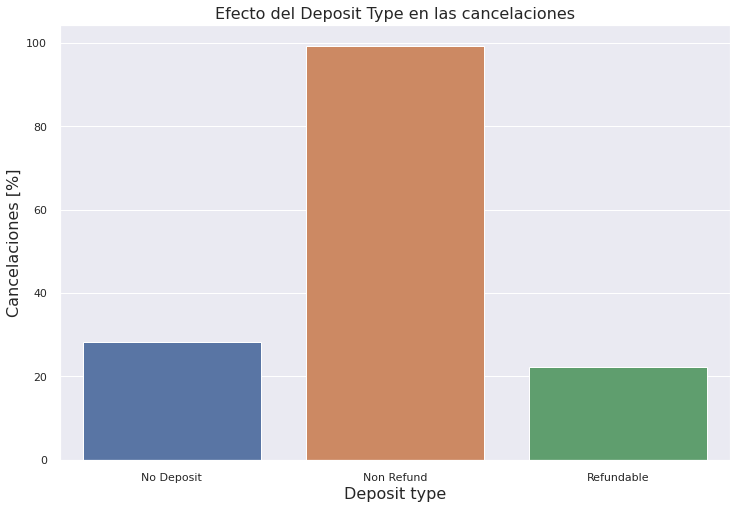

In [169]:
deposit_cancel_data = df.groupby("deposit_type")["is_canceled"].describe()

plt.figure(figsize=(12, 8))
sns.barplot(x=deposit_cancel_data.index, y=deposit_cancel_data["mean"] * 100)
plt.title("Efecto del Deposit Type en las cancelaciones", fontsize=16)
plt.xlabel("Deposit type", fontsize=16)
plt.ylabel("Cancelaciones [%]", fontsize=16)
plt.show()

'Non Refund' y 'is_canceled' están correlacionadas de forma contraintuitiva.
Más del 99% de las personas que pagaron todo el importe por adelantado lo cancelaron. Esto nos lleva a preguntarnos si hay algún problema con los datos.

**¿Qué más podemos destacar de los depósitos no reembolsados?**
Aquí hay una tabla con todos la media de los datos, agrupados por tipo de depósito:

In [170]:
deposit_mean_data = df.groupby("deposit_type").mean()
deposit_mean_data

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
deposit_type,,,,,,,,,,,,,,,,,,,
No Deposit,0.283770,88.756615,27.135310,15.814652,0.970165,2.556799,1.862597,0.118395,0.009069,0.035760,0.042039,0.154911,0.249634,80.566031,189.496772,1.519347,103.525067,0.071129,0.651427
Non Refund,0.993624,212.908891,27.448619,15.595462,0.621718,2.091109,1.811407,0.000617,0.000000,0.004387,0.411462,0.010626,0.012477,49.448482,179.189723,7.992253,89.964017,0.000069,0.001782
Refundable,0.222222,152.098765,20.932099,23.456790,0.975309,2.851852,1.907407,0.030864,0.000000,0.024691,0.000000,0.018519,0.592593,66.037037,227.936842,9.586420,76.209753,0.123457,0.141975


Si se comparan los valores medios de los "Non Refund" con "No Deposit" observamos lo siguiente:

* Los depósitos sin reembolso se caracterizan por un "lead_time" 2 veces mayor
* "is_repeated_guest" Es ~ 1/10
* "previous_cancellations" Es 10 veces mayor
* "previous_bookings_not_canceled" Es 1/15th
* "required_car_parking_spaces" Es casi cero
* Las peticiones especiales son muy raras

Con base en los resultados, parece que especialmente las personas que no han visitado previamente uno de los hoteles reservan, pagan y cancelan repetidamente, lo cual es bastante extraño.



---



**ADR**

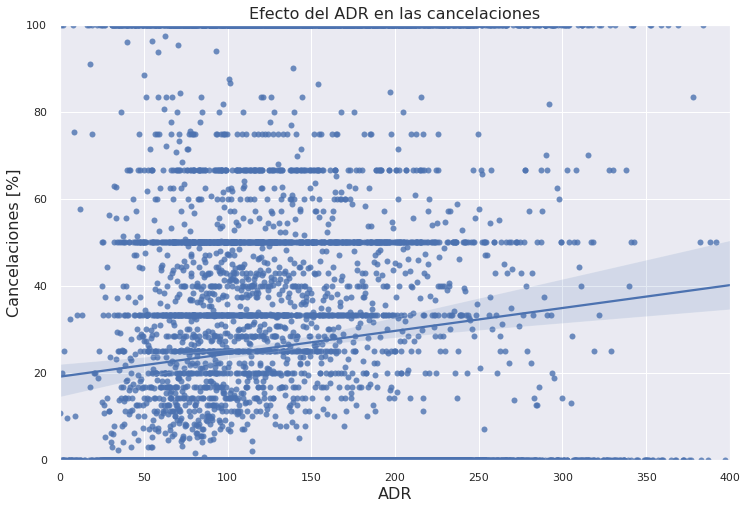

In [171]:
adr_cancel_data = df.groupby("adr")["is_canceled"].describe()

plt.figure(figsize=(12, 8))
sns.regplot(x=adr_cancel_data.index, y=adr_cancel_data["mean"].values * 100)
plt.title("Efecto del ADR en las cancelaciones", fontsize=16)
plt.xlabel("ADR", fontsize=16) #ADR es Average Daily Rate, hace referencia a la tarifa media diaria o ingreso medio diario de una habitación, ocupada durante un período de tiempo específico.
plt.ylabel("Cancelaciones [%]", fontsize=16)
plt.xlim(0,400)
plt.ylim(0,100)
plt.show()

# Data Storytelling

Con base en las visualizaciones de nuestra predicción de cancelaciones podemos observar tres aspectos importantes para responder a nuestra preguntas inicial: ¿Cómo podemos predecir las cancelaciones de un hotel?

En un principio nuestra hipótesis se basó en que podemos predecir las cancelaciones de un hotel con base en el comportamiento y preferencias de un cliente. Un comportamiento puede ser realizar la reserva escasos días antes de la llegada. Una preferencia puede ser el método de pago utilizado por el huésped para realizar el depósito.










---



**Gracias a las visualizaciones podemos reconocer los siguientes resultados:**


*   Las reservas realizadas unos días antes de la fecha de llegada rara vez se cancelan, mientras que las reservas realizadas con más de un año de antelación se cancelan muy a menudo.
*   'Non Refund' y 'is_canceled' están correlacionadas de forma contraintuitiva.
Más del 99% de las personas que pagaron todo el importe por adelantado lo cancelaron. Esto nos llevó a preguntarnos si hay algún problema con los datos.
*   Especialmente las personas que no han visitado previamente uno de los hoteles reservan, pagan y cancelan repetidamente.



---



**¿Qué sucedió con nuestra hipótesis inicial?**

Las visualizaciones nos permitieron avanzar para obtener respuestas, en primer lugar nuestra hipótesis sobre el comportamiento de un cliente es acertada, ya que pudimos observar, por ejemplo, que hay un comportamiento repetitivo de cancelación de la reservación entre los clientes que realizan la reserva con más de un año de antelación.

Es decir, hay mayor probabilidad que un cliente cancele su reservación si esta fue realizada hace más de un año. 

Por su contraparte, hay menor probabilidad que un cliente cancele su reservación si esta fue realizada unos días antes de la fecha de llegada.

In [172]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119390.0,0.103886,0.398555,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0
is_repeated_guest,119390.0,0.031912,0.175767,0.00,0.00,0.000,0.0,1.0


# Analisis Bivariado

In [176]:
#Importamos pandas profiling y demas librerias
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pandas_profiling

In [177]:
#Head del df
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,14.0,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,14.0,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,14.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [179]:
#Totalidad de registros por columna
df.count()

hotel                             119390
is_canceled                       119390
lead_time                         119390
arrival_date_year                 119390
arrival_date_month                119390
arrival_date_week_number          119390
arrival_date_day_of_month         119390
stays_in_weekend_nights           119390
stays_in_week_nights              119390
adults                            119390
children                          119390
babies                            119390
meal                              119390
country                           119390
market_segment                    119390
distribution_channel              119390
is_repeated_guest                 119390
previous_cancellations            119390
previous_bookings_not_canceled    119390
reserved_room_type                119390
assigned_room_type                119390
booking_changes                   119390
deposit_type                      119390
agent                             119390
company         

In [180]:
#Observamos el tipo de variable que tiene nuestro data frame
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                  object
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [181]:
#Principales medidas estadisticas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119390.0,0.103886,0.398555,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0
is_repeated_guest,119390.0,0.031912,0.175767,0.00,0.00,0.000,0.0,1.0


In [182]:
#Tipo de estructura del dataset
type(df)

pandas.core.frame.DataFrame

In [183]:
#El shape
df.shape

(119390, 32)

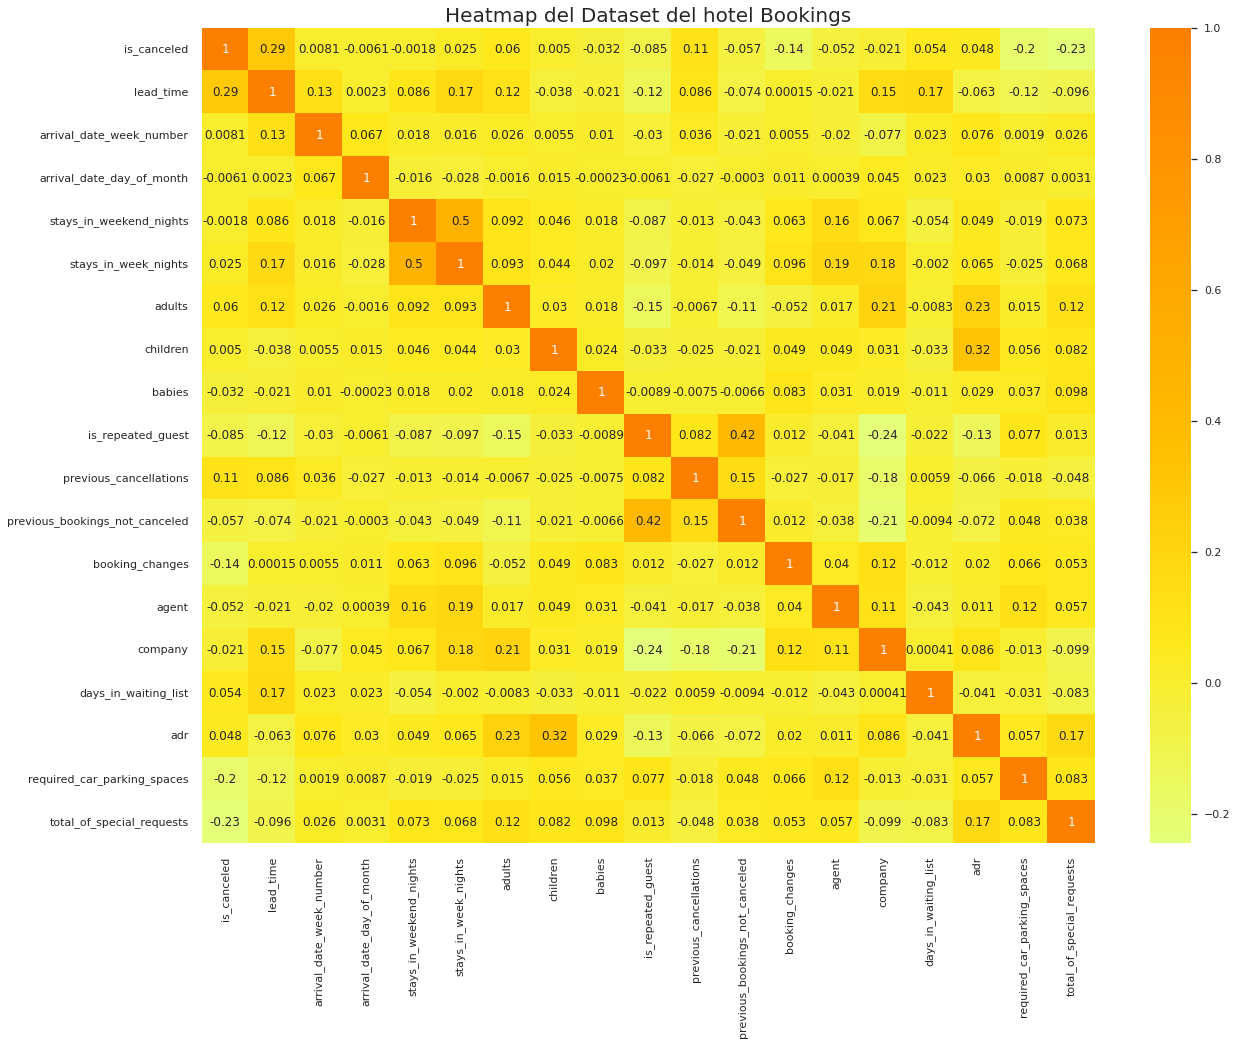

In [184]:
#HeatMap del df
plt.rcParams['figure.figsize'] = (20, 15)

sns.heatmap(df.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap del Dataset del hotel Bookings', fontsize = 20)
plt.show()

Text(0.5, 1.0, 'Relacion entre cantidad de noches durante la semana y cantidad de chicos')

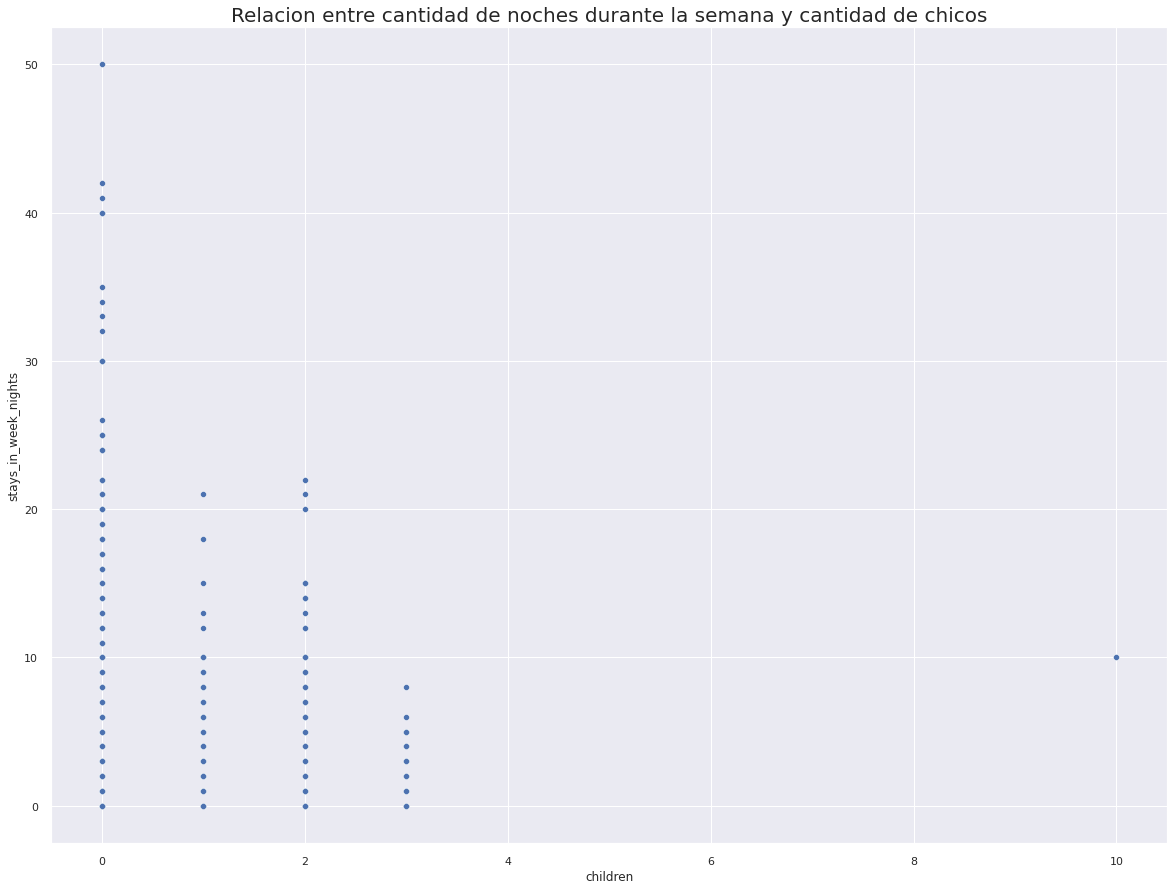

In [186]:
 # Cantidad de noches vs Children
sns.scatterplot(y="stays_in_week_nights", x="children", data=df)
plt.title('Relacion entre cantidad de noches durante la semana y cantidad de chicos', fontsize = 20, fontweight = 30)

Aqui podemos observar que a medida que son menos Niños en la familia, mayor es la cantidad de dias que se queda de Lunes a Viernes la familia.-

Text(0.5, 1.0, 'Relacion entre cantidad de noches durante la semana y cantidad de adultos')

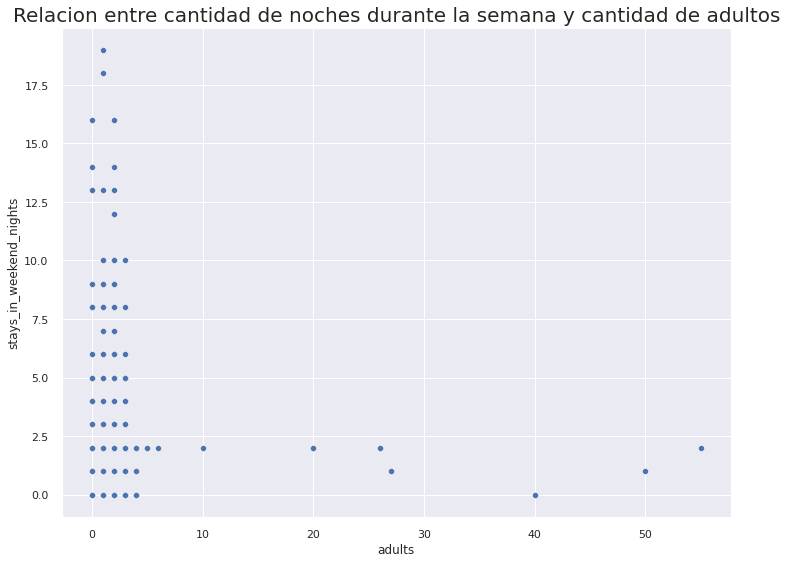

In [189]:
# Cantidad de noches de fin de semana vs Adults
sns.scatterplot(y= "stays_in_weekend_nights", x="adults", data=df)
plt.title('Relacion entre cantidad de noches durante la semana y cantidad de adultos', fontsize = 20, fontweight = 30)

Podemos observar que a medidas que para la cantidad de 
adultos que se reserve el hotel aumenta la cantidad de dias que se reservan de fines de semana disminuye.-

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


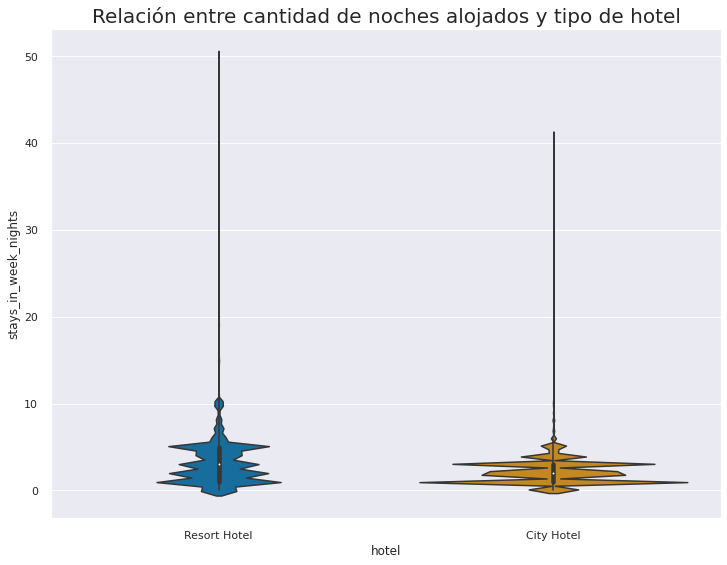

In [188]:
# Noches de semana vs Hotel
plt.rcParams['figure.figsize'] = (12, 9)
sns.violinplot(df['hotel'], df['stays_in_week_nights'], palette = 'colorblind')
plt.title('Relación entre cantidad de noches alojados y tipo de hotel', fontsize = 20, fontweight = 30)
plt.show()

Podemos observar mediante el grafico bivariado que los huespedes que se alojan en un resort tienden a quedarse mas noches de semana que aquellos que se alojan en un City hotel

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


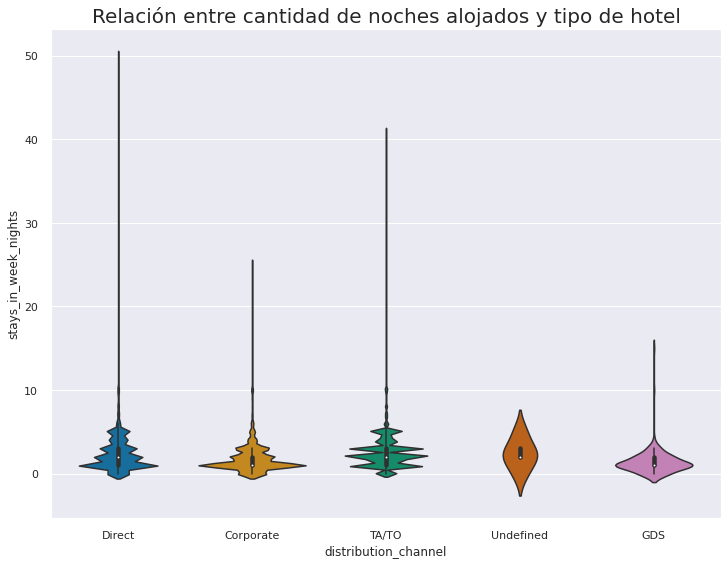

In [194]:
# Noches de semana vs Canales de reservas
plt.rcParams['figure.figsize'] = (12, 9)
sns.violinplot (df['distribution_channel'], df['stays_in_week_nights'], palette = 'colorblind')
plt.title('Relación entre cantidad de noches alojados y tipo de hotel', fontsize = 20, fontweight = 30)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


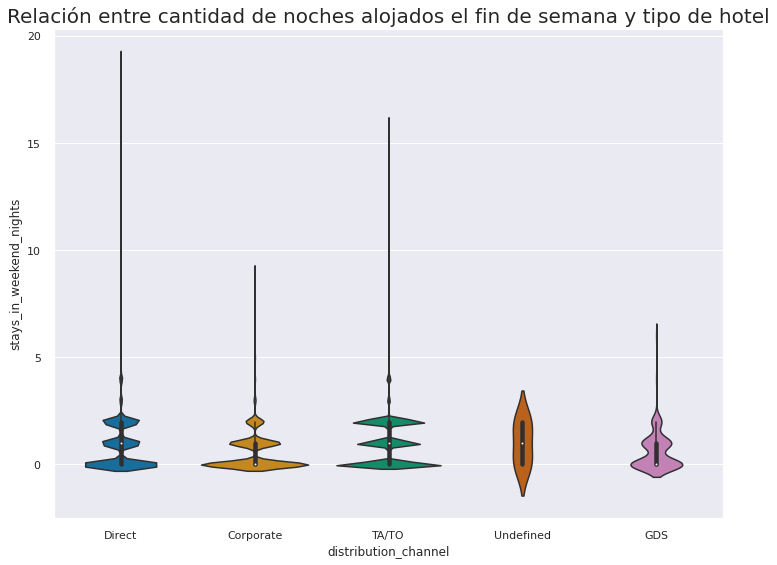

In [200]:
# Noches de fin de semana vs  Canales de reservas
plt.rcParams['figure.figsize'] = (12, 9)
sns.violinplot (df['distribution_channel'], df['stays_in_weekend_nights'], palette = 'colorblind')
plt.title('Relación entre cantidad de noches alojados el fin de semana y tipo de hotel', fontsize = 20, fontweight = 30)
plt.show()

In [201]:
country_df.count

<bound method DataFrame.count of   country  count of guests
0     PRT            49078
1     GBR            12129
2     FRA            10415
3     ESP             8568
4     DEU             7287
5     ITA             3766
6     IRL             3375
7     BEL             2342
8     BRA             2224
9     NLD             2104>

In [227]:
#Filtramos la data y realizamos una agrupacion
df_hotel_Adults_Children = df.groupby(['hotel']).mean()[['adults', 'children']]
df

,adults,children
hotel,,
City Hotel,1.850977,0.091365
Resort Hotel,1.867149,0.128682


Observamos que existe en promedio una mayor cantidad de adulto y de niños en un hotel del tipo resort a un hotel city.

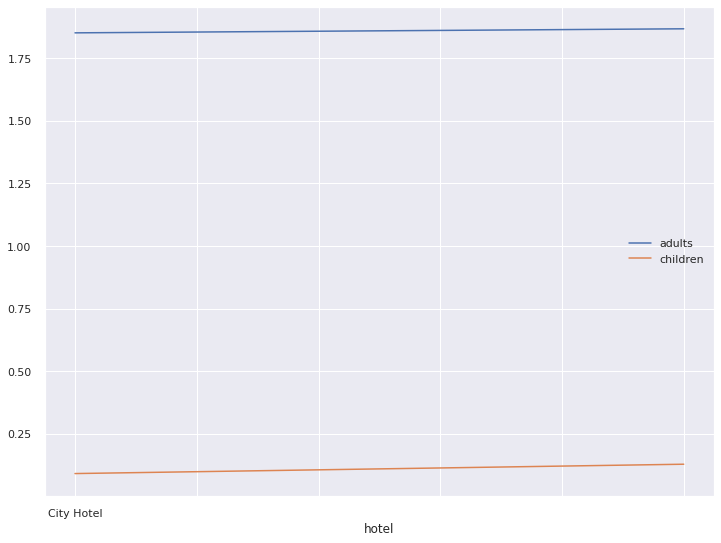

In [247]:
df_hotel_Adults_Children.plot.line()